# 4. Graph

Graphs are perfect to show the interactions between different items. Sometimes called networks, graphs are made up of nodes. Nodes can be connected with each other using edges, which can be both directed and undirected.

In this notebook, we will go through examples of drawing different kinds of networks from scratch.

> Multiplex uses networkx to draw graphs, which means that the package has to be installed. You can learn more about networkx [here](https://networkx.github.io/).

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The first network is the [Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network). Even superheros have friends.

The dataset used is made up of pairs of superheroes that appeared together in the same comic. The dataset is _huge_ so we filter out superhero connections that appear fewer than 50 times together.

In [2]:
df = pd.read_csv('data/the-marvel-universe-social-network/hero-network.csv')
df.columns = ('source', 'target')
df = df.groupby(['source', 'target']).size().reset_index()
df.columns = ('source', 'target', 'frequency')
df = df[df['frequency'] > 50]
df = df[df['source'] != df['target']]
df.sort_values(by='frequency', ascending=False)

,source,target,frequency
142513,PATRIOT/JEFF MACE,MISS AMERICA/MADELIN,1267
124772,MISS AMERICA/MADELIN,PATRIOT/JEFF MACE,627
196026,THING/BENJAMIN J. GR,HUMAN TORCH/JOHNNY S,382
85445,HUMAN TORCH/JOHNNY S,MR. FANTASTIC/REED R,366
196250,THING/BENJAMIN J. GR,MR. FANTASTIC/REED R,365
...,...,...,...
109528,LOCKHEED,NIGHTCRAWLER/KURT WA,51
18258,BLACK PANTHER/T'CHAL,THOR/DR. DONALD BLAK,51
84219,HULK/DR. ROBERT BRUC,NIGHTHAWK II/KYLE RI,51
213969,"WATSON-PARKER, MARY","OSBORN, HARRY",51


Multiplex draws networks from networkx graphs. Therefore before drawing the Marvel Universe superhero network, we convert the data into a graph. We make the dataset smaller by focusing on the biggest and most popular superheroes in the dataset.

In [3]:
G = nx.convert_matrix.from_pandas_edgelist(df, 'source', 'target')
degree = sorted(G.degree(), key=lambda hero: hero[1], reverse=True)
top = [ hero for hero, neighbours in degree if neighbours > 2 ][:50]
G = G.subgraph(top)
print(f"{ len(G.nodes) } nodes, { len(G.edges) } edges")

50 nodes, 229 edges


As soon as we create the graph, plotting it is as simple as calling the drawable's `draw_graph` method, using `s` to control the node size.

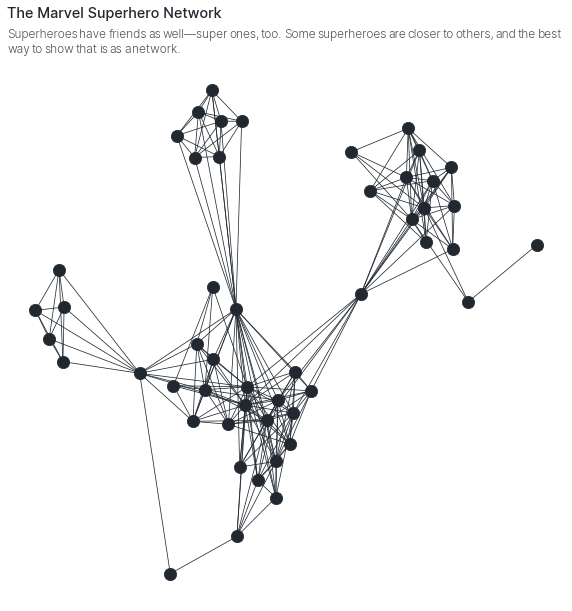

In [36]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

figure = plt.figure(figsize=(10, 10))
viz = drawable.Drawable(figure)
nodes, edges = viz.draw_graph(G, s=150, k=0.44, color='C0', linewidth=0.75)

viz.set_title('The Marvel Superhero Network', loc='left')
viz.set_caption("""Superheroes have friends as well—super ones, too.
                   Some superheroes are closer to others, and the best way to show that is as a network.""")
plt.show()

You can learn more about graph visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/graph.html).